In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as pltABC
import seaborn as sns
# from pandas import DataFrame, Series

Coffee_data = "Coffee_commodity_USDA.csv"

# Read Data File and store into Pandas Data Frames
Coffee_data_df = pd.read_csv(Coffee_data)
Coffee_data_df.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0
1,711100,"Coffee, Green",AG,Algeria,2004,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0
2,711100,"Coffee, Green",AG,Algeria,2005,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0
3,711100,"Coffee, Green",AG,Algeria,2006,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0
4,711100,"Coffee, Green",AG,Algeria,2007,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0


In [3]:
reduced_Coffee_data_df = Coffee_data_df.loc[:, ["Country_Name", "Market_Year", "Value"]]
reduced_Coffee_data_df.head()

,Country_Name,Market_Year,Value
0,Algeria,2003,0
1,Algeria,2004,0
2,Algeria,2005,0
3,Algeria,2006,0
4,Algeria,2007,0


In [4]:
reduced_Coffee_data_df = reduced_Coffee_data_df.loc[(
    reduced_Coffee_data_df["Value"] > 0) & (reduced_Coffee_data_df["Market_Year"] > 2013)]
reduced_Coffee_data_df.head()

,Country_Name,Market_Year,Value
211,Bolivia,2014,128
212,Bolivia,2015,100
213,Bolivia,2016,80
214,Bolivia,2017,75
215,Bolivia,2018,85


In [5]:
reduced_Coffee_data_df_ind = reduced_Coffee_data_df.reset_index(drop=True)
reduced_Coffee_data_df_ind.head()

,Country_Name,Market_Year,Value
0,Bolivia,2014,128
1,Bolivia,2015,100
2,Bolivia,2016,80
3,Bolivia,2017,75
4,Bolivia,2018,85


In [6]:
# reduced_Coffee_data_df_ctr_new = reduced_Coffee_data_df_ctr.groupby("Country_Name")["Value"].sum()
reduced_Coffee_data_df_ctr_new = reduced_Coffee_data_df_ind.groupby("Country_Name")

final_df = pd.DataFrame(reduced_Coffee_data_df_ctr_new["Value"].sum())
final_df.head()

,Value
Country_Name,
Bolivia,553
Brazil,243800
Burundi,1180
Cameroon,300
China,11872


In [7]:
final_df = final_df.rename(
    columns={"Value": "Total Production"})
final_df.head()

,Total Production
Country_Name,
Bolivia,553
Brazil,243800
Burundi,1180
Cameroon,300
China,11872


In [8]:
final_df = final_df.reset_index()
final_df.head()

,Country_Name,Total Production
0,Bolivia,553
1,Brazil,243800
2,Burundi,1180
3,Cameroon,300
4,China,11872


In [9]:
# top_five = reduced_Coffee_data_df_ind.loc[reduced_Coffee_data_df_ind["Country_Name"] == "Brazil"]
# top_five

In [10]:
final_df1 = final_df.nlargest(5,'Total Production')
final_df1
# piechart

,Country_Name,Total Production
1,Brazil,243800
5,Colombia,82875
12,Ethiopia,40428
15,Honduras,37160
26,Peru,23650


In [11]:
countries = ["Brazil", "Columbia", "Ethiopia", "Honduras","Peru"]
total_prod = [243800, 82875, 40428, 37160, 23650]
colors = ["brown","tan","sienna","goldenrod","chocolate"]
explode = (0.1,0,0,0,0)
plt.title("Coffee Production in Top 5 Countries in last 5 years")
plt.pie(total_prod, explode=explode, labels=countries, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("Coffee_predict.png")
plt.show()


<IPython.core.display.Javascript object>

In [12]:
coffee_yearly_data = reduced_Coffee_data_df_ind.copy()
coffee_yearly_data.head()

,Country_Name,Market_Year,Value
0,Bolivia,2014,128
1,Bolivia,2015,100
2,Bolivia,2016,80
3,Bolivia,2017,75
4,Bolivia,2018,85


In [13]:
coffee_yearly_data_ind = coffee_yearly_data.set_index('Country_Name')

In [14]:
# Collect the years where data was collected
years = coffee_yearly_data_ind.keys()
coffee_yearly_data_ind.head(10)

,Market_Year,Value
Country_Name,,
Bolivia,2014,128
Bolivia,2015,100
Bolivia,2016,80
Bolivia,2017,75
Bolivia,2018,85
Bolivia,2019,85
Brazil,2014,41800
Brazil,2015,37300
Brazil,2016,36100


In [19]:
a = coffee_yearly_data_ind.loc['Brazil']
b = coffee_yearly_data_ind.loc['Honduras']


<IPython.core.display.Javascript object>


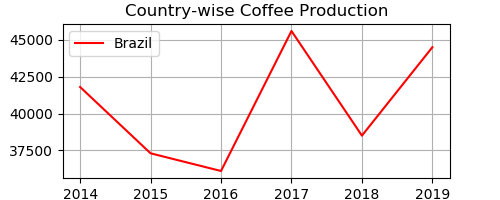

<IPython.core.display.Javascript object>


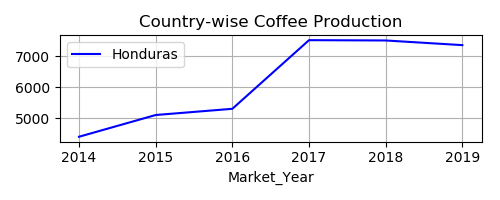

In [22]:
a.plot(kind="line", x="Market_Year",y="Value",grid=True, color = "red",figsize=(5,2),
              title="Country-wise Coffee Production", label = "Brazil")
b.plot(kind="line", x="Market_Year",y="Value",grid=True, color = "blue",figsize=(5,2),
              title="Country-wise Coffee Production", label = "Honduras")

#plt.legend(handles=[a1, b1], loc="best")
plt.show()
plt.tight_layout()